# PIP INSTALL

In [ ]:
!pip install langchain

In [ ]:
!pip install python-dotenv

In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install -qU langchain-cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.4 MB/s eta 0:00:00


In [ ]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.32
    Uninstalling langchain-core-0.3.32:
      Successfully uninstalled langchain-core-0.3.32


In [ ]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install tiktoken

In [ ]:
import requests
from bs4 import BeautifulSoup
from langchain.tools import tool
from dotenv import load_dotenv
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain import hub
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
import operator
from typing import Annotated, List, Tuple, TypedDict
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain.tools import tool
from typing import Literal
from typing import Union
from langgraph.graph import StateGraph, START
import asyncio
import getpass
import os
from IPython.display import Image, display
from langchain_core.runnables.config import RunnableConfig
import logging
import tiktoken

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


## Setup

- LangChain tools : https://python.langchain.com/v0.2/docs/how_to/custom_tools/

In [ ]:
os.environ["OPENAI_API_KEY"] = ""
os.environ["TAVILY_API_KEY"] = ""

## MedQA

In [ ]:
import json
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
questions_dict = {}
answers_dict = {}

with open('/content/drive/MyDrive/Colab Notebooks/Multi-supervisor/Expriments/train.jsonl', 'r') as file:
# with open('train.jsonl', 'r') as file:
    for i, line in enumerate(file):
        item = json.loads(line)

        # put questions and options in this dict
        questions_dict[f"question_{i+1}"] = {
            "question": item["question"],
            "options": item["options"]
        }

        # put answers in this dict
        answers_dict[f"question_{i+1}"] = item["answer_idx"]

In [ ]:
numbers_question = 5

# print first 10 records
def preview_dataset():
  print("Questions Dictionary (first 15):")
  for key in list(questions_dict.keys())[:numbers_question]:
      print(f"{key}: {questions_dict[key]}")

  print("\nAnswers Dictionary (first 15):")
  for key in list(answers_dict.keys())[:numbers_question]:
      print(f"{key}: {answers_dict[key]}")

preview_dataset()

Questions Dictionary (first 15):
question_1: {'question': 'A 23-year-old pregnant woman at 22 weeks gestation presents with burning upon urination. She states it started 1 day ago and has been worsening despite drinking more water and taking cranberry extract. She otherwise feels well and is followed by a doctor for her pregnancy. Her temperature is 97.7°F (36.5°C), blood pressure is 122/77 mmHg, pulse is 80/min, respirations are 19/min, and oxygen saturation is 98% on room air. Physical exam is notable for an absence of costovertebral angle tenderness and a gravid uterus. Which of the following is the best treatment for this patient?', 'options': {'A': 'Ampicillin', 'B': 'Ceftriaxone', 'C': 'Ciprofloxacin', 'D': 'Doxycycline', 'E': 'Nitrofurantoin'}}
question_2: {'question': 'A 3-month-old baby died suddenly at night while asleep. His mother noticed that he had died only after she awoke in the morning. No cause of death was determined based on the autopsy. Which of the following preca

## APPs


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [ ]:
# just put every tool together

tools = [TavilySearchResults(max_result=3)]

## Define the Execution Agent

In [ ]:
# https://smith.langchain.com/hub?organizationId=deb0bf59-361e-498c-ae36-2761f0c494b3
prompt = hub.pull("wfh/react-agent-executor")
prompt.pretty_print()

models = ["gpt-3.5-turbo-0125", "gpt-4-turbo-2024-04-09"]

llm = ChatOpenAI(model=models[0])
agent_executor = create_react_agent(llm, tools, messages_modifier=prompt)

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


================================ System Message ================================

You are a helpful assistant.

============================= Messages Placeholder =============================

{{messages}}


In [ ]:
agent_executor.invoke({"messages": [("user", "give me some cough info")]})

{'messages': [HumanMessage(content='give me some cough info', additional_kwargs={}, response_metadata={}, id='a807790e-5425-4896-92ce-a03f61b46640'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_oIQhbkRr9RNQUTSyiaREmp98', 'function': {'arguments': '{"query":"cough information"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 92, 'total_tokens': 113, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-46538cd1-06e2-43c5-a5d7-904b85ef75b0-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'cough information'}, 'id': 'call_oIQhbkRr9RNQUTSyiaREmp98', 'type': 'tool

## Define the state

1. need to track the current plan;
2. track previously executed steps;
3. need to have some state to represent the final response as well as the original input;

In [ ]:
# class planexecute
class PlanExecute(TypedDict):
    input: str
    plan: List[str]
    past_steps: Annotated[List[Tuple], operator.add]
    response: str

# class plan
class Plan(BaseModel):
    """Plan to follow in future"""

    steps: List[str] = Field(
        description="different steps to follow, should be in sorted order"
    )

planner_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """For the given objective, come up with a simple step by step plan. \
If any specialized medical terms are found in the input question, use Travily_Search to search for them and include the results in the plan. \
When using the Travily_Search tool, only use the name of the disease or condition as the search query (e.g., persistent cough → cough, stroke → stroke or ischemic stroke, etc.\
And your final goal is select the right answer from the options given.).""",
        ),
        ("placeholder", "{messages}"),
    ]
)
planner = planner_prompt | ChatOpenAI(
    model=models[0], temperature=0
).with_structured_output(Plan)

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1362: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1375: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo-0125 since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


## Re-Plan Step

In [ ]:
class Response(BaseModel):
    """Response to user."""

    response: str


class Act(BaseModel):
    """Action to perform."""

    action: Union[Response, Plan] = Field(
        description="Action to perform. If you want to respond to user, use Response. "
        "If you need to further use tools to get the answer, use Plan."
    )


replanner_prompt = ChatPromptTemplate.from_template(
    """For the given objective, come up with a simple step by step plan. \
This plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps. \
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.

Your objective was this:
{input}

Your original plan was this:
{plan}

You have currently done the follow steps:
{past_steps}

Update your plan accordingly. If no more steps are needed and you can return to the user, then respond with that. Otherwise, fill out the plan. Only add steps to the plan that still NEED to be done. Do not return previously done steps as part of the plan."""
)


replanner = replanner_prompt | ChatOpenAI(
    model=models[0], temperature=0
).with_structured_output(Act)

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1362: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1375: UserWarning: Cannot use method='json_schema' with model gpt-3.5-turbo-0125 since it doesn't support OpenAI's Structured Output API. You can see supported models here: https://platform.openai.com/docs/guides/structured-outputs#supported-models. To fix this warning, set `method='function_calling'. Overriding to method='function_calling'.
  warnings.warn(


## Create the Graph

In [ ]:
import tiktoken

encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

async def execute_step(state: PlanExecute):
    # Extract the plan and format the first task
    plan = state["plan"]
    plan_str = "\n".join(f"{i+1}. {step}" for i, step in enumerate(plan))
    task = plan[0]
    task_formatted = f"""For the following plan:\n{plan_str}\n\nYou are tasked with executing step {1}, {task}."""

    # Calculate token usage for input
    input_tokens = len(encoding.encode(task_formatted))

    # Invoke the agent executor
    agent_response = await agent_executor.ainvoke(
        {"messages": [("user", task_formatted)]}
    )

    # Calculate token usage for output
    output_tokens = len(encoding.encode(agent_response["messages"][-1].content))

    print("AGENT_RESPONSE#############################")
    print(f"Input Tokens: {input_tokens}")
    print(f"Output Tokens: {output_tokens}")
    print(f"Total Tokens: {input_tokens + output_tokens}")

    return {
        "past_steps": [(task, agent_response["messages"][-1].content)],
        "token_usage": {
            "input_tokens": input_tokens,
            "output_tokens": output_tokens,
            "total_tokens": input_tokens + output_tokens,
        },
    }

async def plan_step(state: PlanExecute):

    plan_input_tokens = sum(len(encoding.encode(message[1])) for message in [("user", state["input"])])

    plan = await planner.ainvoke({"messages": [("user", state["input"])]})

    output_text = "\n".join(plan.steps)  # 假设 steps 是一个字符串列表
    plan_output_tokens = len(encoding.encode(output_text))

    print("PLAN ------------------------------")
    print(f"Input Tokens: {plan_input_tokens}")
    print(f"Output Tokens: {plan_output_tokens}")
    print(f"Total Tokens: {plan_input_tokens + plan_output_tokens}")

    return {
        "plan": plan.steps,
        "token_usage": {
            "input_tokens": plan_input_tokens,
            "output_tokens": plan_output_tokens,
            "total_tokens": plan_input_tokens + plan_output_tokens,
        },
    }

async def replan_step(state: PlanExecute):

    state_dict = state if isinstance(state, dict) else state.dict()
    input_text = str(state_dict)
    input_tokens = len(encoding.encode(input_text))

    output = await replanner.ainvoke(state)

    if hasattr(output, "action") and hasattr(output.action, "steps"):
        output_text = "\n".join(output.action.steps)
    elif hasattr(output, "action") and hasattr(output.action, "response"):
        output_text = output.action.response
    else:
        output_text = ""

    output_tokens = len(encoding.encode(output_text))

    print(f"Input Tokens: {input_tokens}")
    print(f"Output Tokens: {output_tokens}")
    print(f"Total Tokens: {input_tokens + output_tokens}")

    if isinstance(output.action, Response):
        return {
            "response": output.action.response,
            "token_usage": {
                "input_tokens": input_tokens,
                "output_tokens": output_tokens,
                "total_tokens": input_tokens + output_tokens,
            },
        }
    else:
        return {
            "plan": output.action.steps,
            "token_usage": {
                "input_tokens": input_tokens,
                "output_tokens": output_tokens,
                "total_tokens": input_tokens + output_tokens,
            },
        }



def should_end(state: PlanExecute) -> Literal["agent", "__end__"]:
    if "response" in state and state["response"]:
        return "__end__"
    else:
        return "agent"

In [ ]:
workflow = StateGraph(PlanExecute)

# Add the plan node
workflow.add_node("planner", plan_step)

# Add the execution step
workflow.add_node("agent", execute_step)

# Add a replan node
workflow.add_node("replan", replan_step)

workflow.add_edge(START, "planner")

# From plan we go to agent
workflow.add_edge("planner", "agent")

# From agent, we replan
workflow.add_edge("agent", "replan")

workflow.add_conditional_edges(
    "replan",
    # Next, we pass in the function that will determine which node is called next.
    should_end,
)

app = workflow.compile()

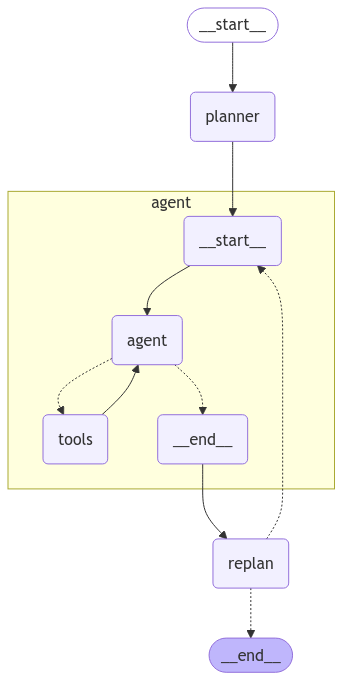

In [ ]:
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

# TESTING

In [ ]:
###### TOOLS FUNCTIONS

def extract_options_from_input(input_query):
    """
    Extract dynamic options with their content from the formatted input query.
    Returns a list of tuples where each tuple contains the option key and its content.
    """
    import re
    options_pattern = r"Options:\s*(.*?)\nPrompt"  # Match the "Options" block
    match = re.search(options_pattern, input_query, re.DOTALL)
    if match:
        options_text = match.group(1).strip()
        # Split the options into lines and extract key-value pairs
        options = [
            (line.split(":")[0].strip(), line.split(":")[1].strip())
            for line in options_text.split("\n") if ":" in line
        ]
        #print(f"Extracted dynamic options with content: {options}")
        return options
    print("Failed to extract options. Default options will be used.")
    return [("A", "Default Option A"), ("B", "Default Option B"), ("C", "Default Option C"),
            ("D", "Default Option D"), ("E", "Default Option E")]

# Function to extract the best option from a value based on dynamic options
def extract_option_from_value(value, dynamic_options):
    """
    Extract the best matching option from the value, using the dynamic options list.
    """
    try:
        if isinstance(value, dict):
            for option, _ in dynamic_options:
                if (("the correct answer is {" + option.lower() + "}") in str(value).lower()) or (("the correct answer is " + option.lower())  in str(value).lower()):
                    return option
        elif isinstance(value, str):
            lower_value = value.lower()
            for option, _ in dynamic_options:
                if (("the correct answer is {" + option.lower() + "}") in str(value).lower()) or (("the correct answer is " + option.lower())  in str(value).lower()):
                    return option
    except Exception as e:
        print(f"Error extracting option from value: {e}")
    return None

# Function to format the input query
def format_question_input(question_data):
    """
    Formats question data into a string suitable for the invoke function.
    """
    question = question_data['question']
    # Format options: join each key-value pair with a colon and newline
    options = "\n".join([f"{key}: {value}" for key, value in question_data['options'].items()])

    # Create the formatted input
    formatted_input = f"""Question: {question}
Options:
{options}
Prompt: When you think you have the correct answer, you should give user the answer, like that: the correct answer is {{A}}"""
    return formatted_input.strip()


In [ ]:
import random

plan_arr = []

async def invoke(input_query):
    """
    Main function to handle the recursive workflow.
    Ensures intermediate results are stored and attempts to extract the final result from the agent's output.
    """
    config = RunnableConfig(recursion_limit=15)  # Set recursion limit
    inputs = {"input": input_query}
    result = None
    recursion_count = 1
    intermediate_results = []  # Store intermediate results
    extracted_option = []

    # Extract dynamic options with content
    dynamic_options = extract_options_from_input(input_query)  # List of tuples [(A, "Ampicillin"), (B, "Ceftriaxone"), ...]
    option_keys = [opt[0] for opt in dynamic_options]  # Extract only the keys ["A", "B", ...]

    try:
        # Process events incrementally

        async for event in app.astream(inputs, config=config):
            print(f"Recursion count: {recursion_count}")
            recursion_count += 1

            for key, value in event.items():
                if key != "__end__":
                    print(f"Intermediate event key: {key}, value: {value}")
                    if 'plan' in value:
                      for item in value['plan']:
                        plan_arr.append(item)
                    # Store intermediate results every 5 recursions
                    if recursion_count % 5 == 0:

                        # Extract option from value
                        extracted_option = extract_option_from_value(value, dynamic_options)
                        if extracted_option:
                            print(f"Extracted option: {extracted_option}")
                        else:
                            extracted_option = random.choice(option_keys)  # Randomly choose an option if no valid one found
                            print(f"No valid option found. Using random option: {extracted_option}")

                        intermediate_results.append((extracted_option))
                        print(f"Stored intermediate result at recursion {recursion_count}: {extracted_option}")
                        print(intermediate_results)

                    # Check for the final answer
                    if "the correct answer is" in str(value).lower():
                        print("***************Final result found during recursion.")
                        extracted_option = extract_option_from_value(value, dynamic_options)
                        return {
                            "answer": extracted_option,
                            "details": value,
                            "options": dynamic_options,
                        }

    except RuntimeError:
        print("Recursion limit reached.")
    except Exception as e:
        print(f"An error occurred: {e}")

    # Handle recursion limit without a final result
    if not result and intermediate_results:
        print("***************No final result. Returning the last intermediate result from storage.")
        last_option = intermediate_results[-1]

        result = {
            "answer": last_option,
            "details": "No final result. Using the last intermediate value.",
            "options": dynamic_options
        }
    else:
        print("No conclusive result could be determined.")
        result = {"answer": None, "details": "Failed to determine a result.", "options": dynamic_options}

    return result

In [ ]:
import time
import psutil
import logging

# Function to get memory usage in MB
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 ** 2)  # Memory in MB

starting_question = 0
numbers_question = 1
plan_arr = []

# time, memory and recursion steps
total_time = 0
total_memory = 0

for i in range(starting_question, starting_question + numbers_question):
  print("currently process question" + str(i))
  question_data = questions_dict[f"question_{i}"]
  formatted_input = format_question_input(question_data)

  start_time = time.time()  # Start time
  start_memory = get_memory_usage()  # Start memory usage

  try:
      # Invoke the function with formatted string input
      result = await invoke(formatted_input)
      print(f"Final result for the question:", result)

  except Exception as e:
      logging.error(f"An error occurred during the test: {e}")
      recursion_count = 0

  end_time = time.time()  # End time
  end_memory = get_memory_usage()  # End memory usage

  # Calculate the time and memory used for this question
  elapsed_time = round(end_time - start_time, 10)  # Time in seconds, rounded to 10 decimal places
  memory_used = round(end_memory - start_memory, 10)  # Memory in MB, rounded to 10 decimal places

  total_time += elapsed_time
  total_memory += memory_used

# Calculate and print the average time, memory, recursion count, and interaction count per question
avg_time = round(total_time / numbers_question, 10)
avg_memory = round(total_memory / numbers_question, 10)

print("-----------------------------------------------------------------------------------------------------------------")
print(f"Average time per question: {avg_time} seconds")
print(f"Average memory used per question: {avg_memory} MB")
print("-----------------------------------------------------------------------------------------------------------------")

currently process question61
PLAN ------------------------------
Input Tokens: 288
Output Tokens: 15
Total Tokens: 303
Recursion count: 1
Intermediate event key: planner, value: {'plan': ['Calculate sensitivity', 'Calculate specificity', 'Calculate positive predictive value', 'Calculate negative predictive value']}
AGENT_RESPONSE#############################
Input Tokens: 41
Output Tokens: 65
Total Tokens: 106
Recursion count: 2
Intermediate event key: agent, value: {'past_steps': [('Calculate sensitivity', 'To calculate sensitivity, you need to use the formula:\n\nSensitivity = True Positives / (True Positives + False Negatives)\n\nThis formula helps determine how well a test can identify individuals who actually have the condition. You can calculate sensitivity by dividing the number of true positives by the sum of true positives and false negatives.')]}
Input Tokens: 401
Output Tokens: 12
Total Tokens: 413
Recursion count: 3
Intermediate event key: replan, value: {'plan': ['Calculat